In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew
import matplotlib.pyplot as plt
import os

In [36]:
folder_path = os.path.join(os.getcwd(), "dataset/comcuc")

data_list = []

# Loop through the files in the folder
for file_name in os.listdir(folder_path):
    if not file_name.endswith("labels.npy"):
        # Load the data from the .npy file and append it to the list
        data = np.load(os.path.join(folder_path, file_name))
        data_list.append(data)

# Concatenate the data row-wise
concatenated_data = np.concatenate(data_list, axis=0)

merged_df = pd.DataFrame(concatenated_data)
print(merged_df)

            0         1            2            3            4            5    \
0      0.166783  0.079440   490.957062   491.752991   488.983582   485.077576   
1      0.241420  0.026630   467.413574   516.481689   515.562134   514.210266   
2      0.264509  0.023550   511.845062   508.178223   509.490753   509.445099   
3      0.295410  0.016382   514.254700   512.569824  4576.394043  4567.560547   
4      0.292899  0.026179   462.359528  4722.730469  4718.769043  4696.359375   
...         ...       ...          ...          ...          ...          ...   
19995  0.082101  0.026049   626.667358   643.394470   648.992188   656.033752   
19996  0.053641  0.015959  2578.837646  2536.938721  2497.973877  2488.628418   
19997  0.046596  0.021102   530.830811   532.318115   533.287842   533.808411   
19998  0.095703  0.027426  4758.407227  4773.628906  4658.433594  4591.621582   
19999  0.065988  0.036429    99.773758    99.773758  4897.222656  4873.507812   

               6           

In [38]:
# print new merged df with repeating indices
merged_df.index = merged_df.index % 100
merged_df = merged_df.set_index(pd.Index(merged_df.index))
print(merged_df)

         0         1            2            3            4            5    \
0   0.166783  0.079440   490.957062   491.752991   488.983582   485.077576   
1   0.241420  0.026630   467.413574   516.481689   515.562134   514.210266   
2   0.264509  0.023550   511.845062   508.178223   509.490753   509.445099   
3   0.295410  0.016382   514.254700   512.569824  4576.394043  4567.560547   
4   0.292899  0.026179   462.359528  4722.730469  4718.769043  4696.359375   
..       ...       ...          ...          ...          ...          ...   
95  0.082101  0.026049   626.667358   643.394470   648.992188   656.033752   
96  0.053641  0.015959  2578.837646  2536.938721  2497.973877  2488.628418   
97  0.046596  0.021102   530.830811   532.318115   533.287842   533.808411   
98  0.095703  0.027426  4758.407227  4773.628906  4658.433594  4591.621582   
99  0.065988  0.036429    99.773758    99.773758  4897.222656  4873.507812   

            6            7            8            9    ...    

# Task 3

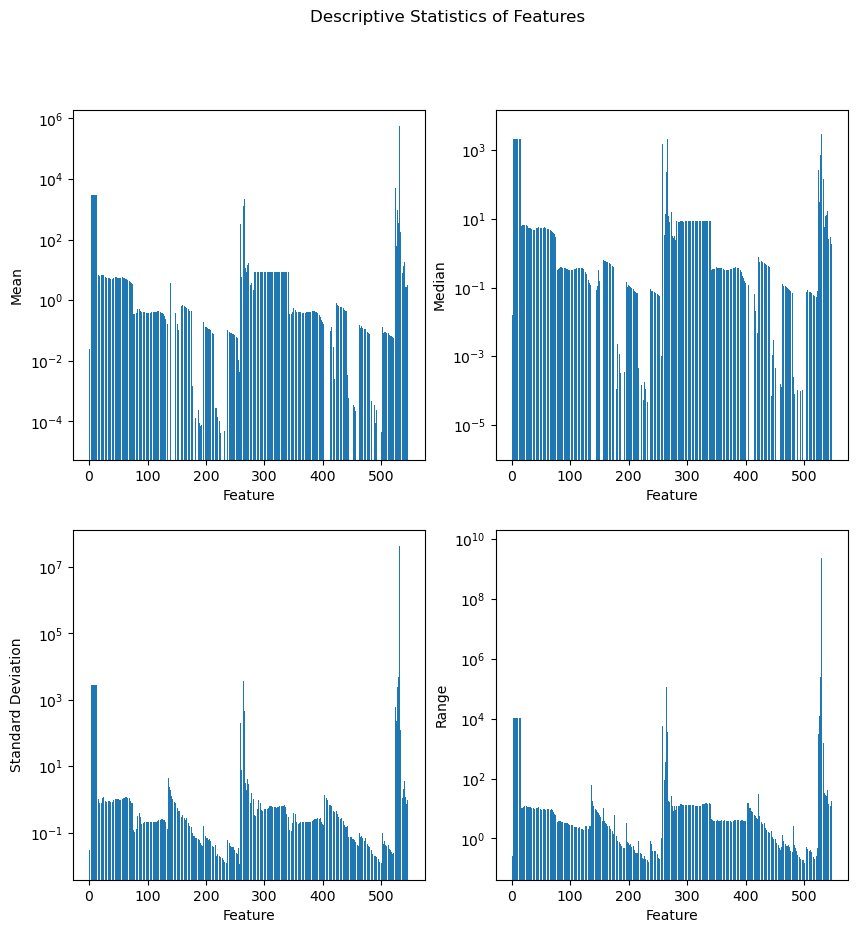

In [52]:
# calculate the descriptive statistics for each feature
stats = merged_df.describe().T[['mean', '50%', 'std', 'min', 'max']]
stats['range'] = stats['max'] - stats['min']

# create a 2x2 plot grid for the four statistics
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

range_stats = np.arange(len(stats.to_numpy()))

# plot the mean in the top left subplot
ax[0, 0].bar(range_stats, stats['mean'])
ax[0, 0].set_xlabel("Feature")
ax[0, 0].set_ylabel("Mean")
ax[0, 0].set_yscale('log')

# plot the median in the top right subplot
ax[0, 1].bar(range_stats, stats['50%'])
ax[0, 1].set_xlabel("Feature")
ax[0, 1].set_ylabel("Median")
ax[0, 1].set_yscale('log')

# plot the standard deviation in the bottom left subplot
ax[1, 0].bar(range_stats, stats['std'])
ax[1, 0].set_xlabel("Feature")
ax[1, 0].set_ylabel("Standard Deviation")
ax[1, 0].set_yscale('log')

# plot the range in the bottom right subplot
ax[1, 1].bar(range_stats, stats['range'])
ax[1, 1].set_xlabel("Feature")
ax[1, 1].set_ylabel("Range")
ax[1, 1].set_yscale('log')

# set the title of the overall plot
fig.suptitle("Descriptive Statistics of Features")

# show the plot
plt.show()

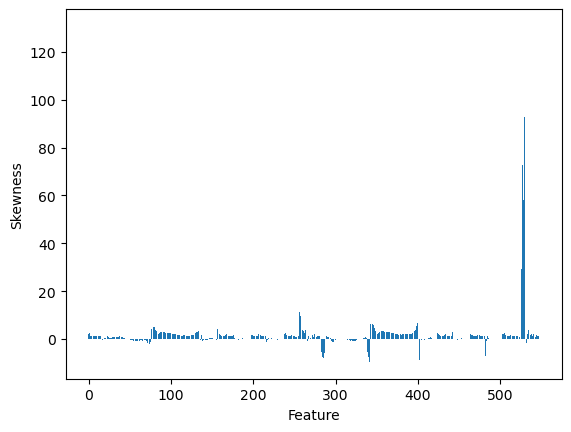

In [54]:
skewness=merged_df.skew()
skew_columns=skewness.to_numpy()
plt.bar(np.arange(len(skew_columns)), skewness)
plt.xlabel("Feature")
plt.ylabel("Skewness")
plt.show()

In [11]:
corr_matrix = merged_df.corr()
print(corr_matrix)

In [65]:
# compute the pairwise correlation coefficients between all pairs of features
corr_coef = merged_df.corr()

# create a mask to remove the upper triangular part of the correlation matrix
mask = np.triu(np.ones_like(corr_coef, dtype=bool)).astype(bool)

# set the diagonal to False to remove self-correlations
np.fill_diagonal(mask, False)

# get the indices of the highly correlated features (with correlation coefficient > 0.9)
high_corr_indices = np.where((np.abs(corr_coef) > 0.9) & mask)

# get the indices of very weakly correlated features (redundant) (with correlation coefficient < 0.01)
redundant_indices = np.where((np.abs(corr_coef) < 0.01) & mask)

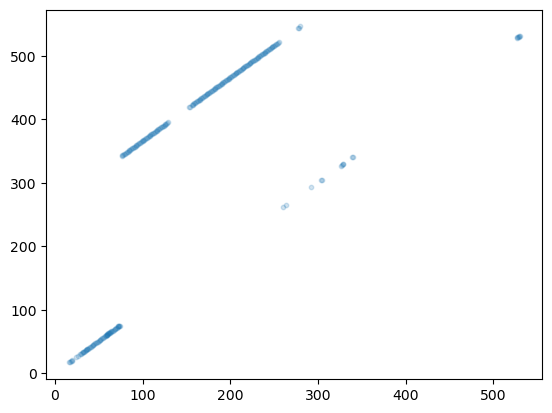

In [74]:
# plot the scatter plots for highly correlated features
plt.scatter(high_corr_indices[0], high_corr_indices[1], s=10, alpha=0.2)

# Task 4